# Training to Spot Fake News
## Research Question
Is training developed to innoculate people against fake news effective? We ran an experiment that tested two training methods designed to help people spot fake news.
## Method
Partipcants were randomly assigned to one of three conditions. Participants in the first condition played the [Bad News Game](https://getbadnews.com/#intro) designed to "vaccinate the world against disinformation". Participants assigned to the second condition watched a [video](https://www.factcheck.org/2016/12/video-spotting-fake-news/) "How to Spot Fake News" cretaed by [factcheck.org](https://www.factcheck.org/). A third condition served as a control condition.

Participants were then asked to classify 20 articles into one of five categories: fake news, satire, extreme bias, political, or credible.  


## Load Libraries and Packages

In [250]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Extract, Transform, Load 
Take original Qualtircs csv file, remove rejected subjects, complete transformations, save clean data .csv file

### Variable Description
ID: Subject ID (mTurk ID)

Cond: Assigned experimental condition. 
T1=Training Game, 
T2=Training video, 
C=Control(no training)

Sex: 1-Male; 2-Female; 3-Other/Prefer not to answer

Age: In years

Art01-Art20: For Article 1-20. Category assigned by participant to article
1- Satire: humor, irony, exaggeration, ridicule, and false information to comment on current events. 
2- Fake News: fabricate information, disseminate deceptive content/grossly distort actual news reports
3- Extreme Bias: may rely on propaganda, decontextualized info, opinions distorted as facts  
4- Political: generally verifiable info in support of certain points of view/political orientations
5- Credible: consistent with traditional and ethical practices in journalism

Cor01-Cor20: For Article 1-20. '1' if assigned correctly, '0' incorrect as assigned by subject 

TotCor: Total correct out of 20 articles classified. 

In [262]:
# Read in original Qualtrics .csv file.
df_raw = pd.read_csv('data/Spot Fake News_July 28, 2019_13.40.csv', skiprows=[1,2])

In [263]:
# Remove rejected responses from data
df_raw = df_raw[df_raw.Consent != 2] # Take out surveys where participant did not consent
df_raw = df_raw[df_raw.Finished != 0] # Take out incomplete surveys
df_raw = df_raw[df_raw.mTurkID != 'asd'] # Non-sensical text responses/incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'A1TXOZQU1O4F0N'] # Response not in mTurk
df_raw = df_raw[df_raw.mTurkID != 'A5LYLHG880ABE'] # Worker repeated survey
df_raw = df_raw[df_raw.mTurkID != 'AZM3H44W1D65P'] # Response not in mTurk
df_raw = df_raw[df_raw.mTurkID != 'A1YC558J4E5KZ'] # Worker repeated survey
df_raw = df_raw[df_raw.mTurkID != 'AK2C9AX5QJWUU'] # Incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'A110KENBXU7SUJ'] # Incorrect completion code
df_raw = df_raw[df_raw.mTurkID != 'AJ60KRY0FTB1F'] # Incorrect completion code

In [264]:
# Create data frame for cleaned data
col_names = ['ID','Cond','Sex','Age','Pol',\
             'Art01','Art02','Art03','Art04','Art05','Art06','Art07','Art08','Art09','Art10',\
             'Art11','Art12','Art13','Art14','Art15','Art16','Art17','Art18','Art19','Art20',\
             'Cor01','Cor02','Cor03','Cor04','Cor05','Cor06','Cor07','Cor08','Cor09','Cor10',\
             'Cor11','Cor12','Cor13','Cor14','Cor15','Cor16','Cor17','Cor18','Cor19','Cor20','TotCor']
df_clean = pd.DataFrame(columns=col_names)

In [265]:
# Transfer Demographic variables
df_clean.ID = df_raw.mTurkID
df_clean.Cond = df_raw.Condition
df_clean.Sex = df_raw.sex
df_clean.Age = df_raw.age_1_TEXT
df_clean.at[130, 'Age'] = 27 # Correct original entry of '1992' to '27'
df_clean.at[188, 'Age'] = 25 # Convert original entry of '1994' to '25'
df_clean.Pol = df_raw.politic

In [266]:
# Create variable for subject's choice of article categorization
df_clean.Art01 = df_raw.Article01
df_clean.Art02 = df_raw.Article02
df_clean.Art03 = df_raw.Article03
df_clean.Art04 = df_raw.Article04
df_clean.Art05 = df_raw.Article05
df_clean.Art06 = df_raw.Article06
df_clean.Art07 = df_raw.Article07
df_clean.Art08 = df_raw.Article08
df_clean.Art09 = df_raw.Article09
df_clean.Art10 = df_raw.Article10
df_clean.Art11 = df_raw.Article11
df_clean.Art12 = df_raw.Article12
df_clean.Art13 = df_raw.Article13
df_clean.Art14 = df_raw.Article14
df_clean.Art15 = df_raw.Article15
df_clean.Art16 = df_raw.Article16
df_clean.Art17 = df_raw.Article17
df_clean.Art18 = df_raw.Article18
df_clean.Art19 = df_raw.Article19
df_clean.Art20 = df_raw.Article20

In [267]:
# Create variable records if article coded correctly and Total number articles coded correctly
# 1: Correctly Coded. 0: Incorrectly Coded
df_clean.Cor01 = np.where(df_raw.Article01==2, 1, 0)
df_clean.Cor02 = np.where(df_raw.Article02==2, 1, 0)
df_clean.Cor03 = np.where(df_raw.Article03==2, 1, 0)
df_clean.Cor04 = np.where(df_raw.Article04==2, 1, 0)
df_clean.Cor05 = np.where(df_raw.Article05==2, 1, 0)
df_clean.Cor06 = np.where(df_raw.Article06==2, 1, 0)
df_clean.Cor07 = np.where(df_raw.Article07==2, 1, 0)
df_clean.Cor08 = np.where(df_raw.Article08==2, 1, 0)
df_clean.Cor09 = np.where(df_raw.Article09==1, 1, 0)
df_clean.Cor10 = np.where(df_raw.Article10==1, 1, 0)
df_clean.Cor11 = np.where(df_raw.Article11==1, 1, 0)
df_clean.Cor12 = np.where(df_raw.Article12==3, 1, 0)
df_clean.Cor13 = np.where(df_raw.Article13==3, 1, 0)
df_clean.Cor14 = np.where(df_raw.Article14==3, 1, 0)
df_clean.Cor15 = np.where(df_raw.Article15==4, 1, 0)
df_clean.Cor16 = np.where(df_raw.Article16==4, 1, 0)
df_clean.Cor17 = np.where(df_raw.Article17==4, 1, 0)
df_clean.Cor18 = np.where(df_raw.Article18==5, 1, 0)
df_clean.Cor19 = np.where(df_raw.Article19==5, 1, 0)
df_clean.Cor20 = np.where(df_raw.Article20==5, 1, 0)
df_clean.TotCor = df_clean.Cor01+df_clean.Cor02+df_clean.Cor03+df_clean.Cor04+df_clean.Cor05+\
    df_clean.Cor06+df_clean.Cor07+df_clean.Cor08+df_clean.Cor09+df_clean.Cor10+df_clean.Cor11+\
    df_clean.Cor12+df_clean.Cor13+df_clean.Cor14+df_clean.Cor15+df_clean.Cor16+df_clean.Cor17+\
    df_clean.Cor18+df_clean.Cor19+df_clean.Cor20

In [268]:
# Save clean data file to .csv
df_clean.to_csv("data/CleanExpData.csv")

## Hypothesis Test
Are training methods effective in helping people identify and classify fake , biased, and legitimate news?

H0: TotCor<sub>Control</sub> = TotCor<sub>T1</sub> = TotCor<sub>T2</sub>

H1: TotCor<sub>Control</sub> != TotCor<sub>T1</sub> != TotCor<sub>T2</sub>

Based on the data, the null hypothesis can not be rejected. We did not observe a significant effect of training on people's ability to appropriately label news articles.

In [287]:
# Load Data File
datafile = "data/CleanExpData.csv"
data = pd.read_csv(datafile)

In [289]:
# Calculate Descriptive Stats
## Overall performance: Classifying 20 articles correctly
print('Articles classified correctly out of 20')
print()
print('Overall: ','N =',df_clean.TotCor.count(),'M =',df_clean.TotCor.mean(),'SD =',\
      df_clean.TotCor.std())
##Control Performance
Control_Check = df_clean['Cond'] =='C'
Control = df_clean[Control_Check]
print('Control: ','N =',Control.TotCor.count(),'M =',Control.TotCor.mean(),'SD =',\
      Control.TotCor.std())
## T1 (Game) Performance
T1_Check = df_clean['Cond'] =='T1'
T1 = df_clean[T1_Check] 
print('T1 (Game): ','N =',T1.TotCor.count(),'M =',T1.TotCor.mean(),'SD =',T1.TotCor.std())

#T2 (Video) Performance
T2_Check = df_clean['Cond'] =='T2'
T2 = df_clean[T2_Check] 
print('T2 (Video): ','N =',T2.TotCor.count(),'M =',T2.TotCor.mean(),'SD =',T2.TotCor.std())

Articles classified correctly out of 20

Overall:  N = 291 M = 7.958762886597938 SD = 3.047613625297768
Control:  N = 94 M = 8.106382978723405 SD = 3.060213237023075
T1 (Game):  N = 96 M = 7.677083333333333 SD = 3.076206795001603
T2 (Video):  N = 101 M = 8.089108910891088 SD = 3.020261610857543


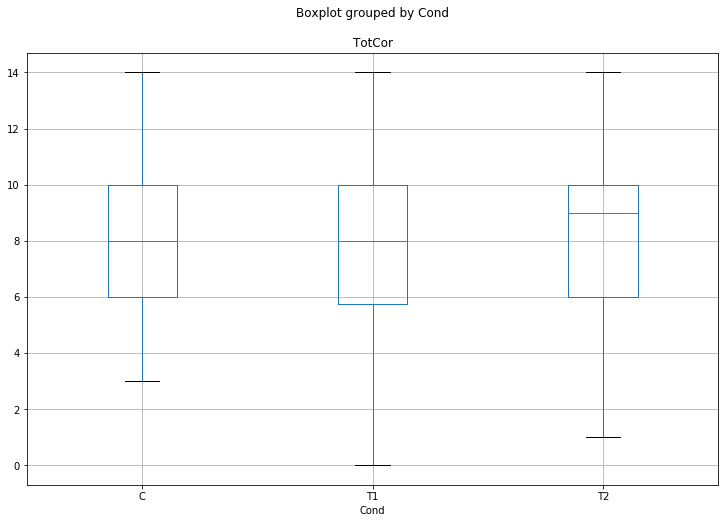

In [290]:
# Create Box Plot
data.boxplot('TotCor', by='Cond', figsize=(12,8))

In [291]:
# Perform ANOVA test
ctrl = data['TotCor'][data.Cond == 'C']
grps = pd.unique(data.Cond.values)
d_data = {grp:data['TotCor'][data.Cond == grp] for grp in grps}

k = len(pd.unique(data.Cond))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('Cond').size()[0] #Participants in each condition
a = .05 # set the significance level

F, p = stats.f_oneway(d_data['C'], d_data['T1'], d_data['T2'])
print('F(',k-1,',',N-k,') = ',F,' p =',p)
if p < a:
    print('Reject the Null Hypothesis')
else: 
    print('Fail to reject the null hypothesis')

F( 2 , 288 ) =  0.6110526748256431  p = 0.5434813683496551
Fail to reject the null hypothesis


## Exploratory Data Analysis

### Article 1: "Alabama declares flu outbreak emergency as vaccine failure becomes obvious to everyone" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

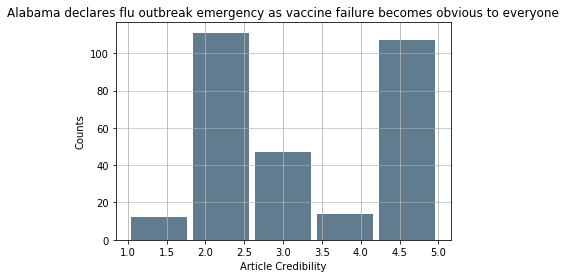

In [292]:
%matplotlib inline
# Article01: "Alabama declares flu outbreak emergency as vaccine failure becomes obvious to 
# everyone" (Fake News)

##Histogram
ser = pd.Series(data.Art01)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Alabama declares flu outbreak emergency as vaccine failure becomes obvious to everyone')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show


### Article 2: "After 8 Years with Obama, Iran Protesters Reveal What Trump’s Support Means to Them As They Prepare to Die for Regime Change" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

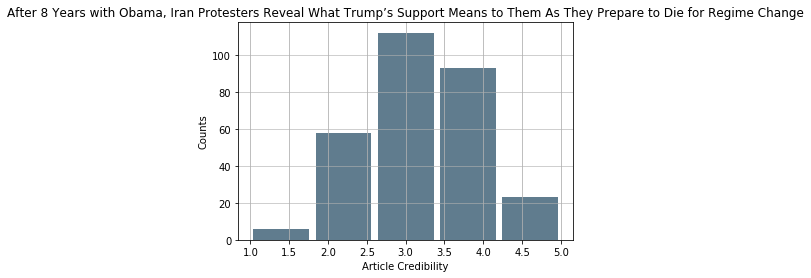

In [282]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art02)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('After 8 Years with Obama, Iran Protesters Reveal What Trump’s Support Means to Them As They Prepare to Die for \
Regime Change')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show

### Article 3: "Google, Facebook, Twitter and Communist China Are Assigning a Threat Matrix Score to All Internet Users" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

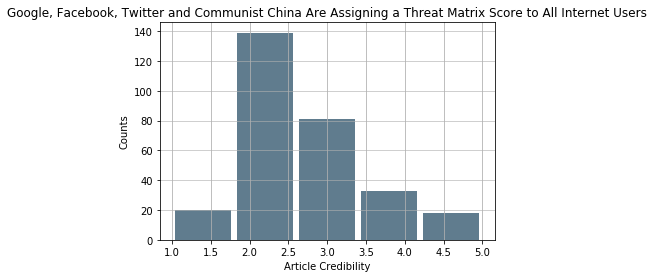

In [294]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art03)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Google, Facebook, Twitter and Communist China Are Assigning a Threat Matrix Score to All Internet Users')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show

### Article 4: "Doctors Warn: Avoid Genetically Modified Food" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

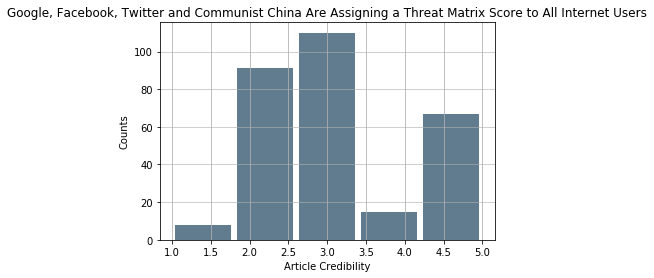

In [295]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art04)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Google, Facebook, Twitter and Communist China Are Assigning a Threat Matrix Score to All Internet Users')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show

### Article 5: "Justice Department Dives Into Hillary Clinton Emails Again!" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

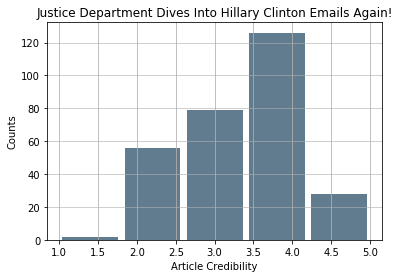

In [297]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art05)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Justice Department Dives Into Hillary Clinton Emails Again!')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show

### Article 6: "Amanda Bynes Tweets About Father’s Abuse and Microchip in Her Brain; Now Under Involuntary Psychiatric Hold" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

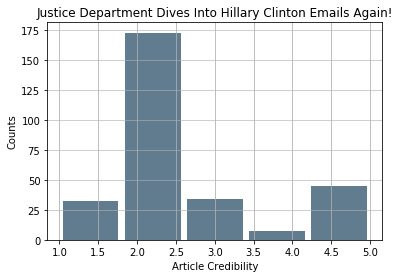

In [298]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art06)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Justice Department Dives Into Hillary Clinton Emails Again!')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show

### Article 7: "The mounting death toll of Obama's political enemies..." (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

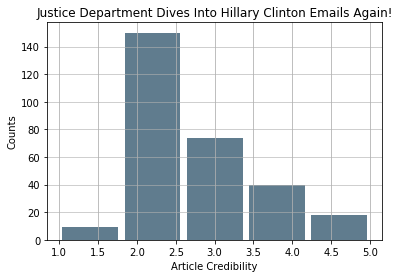

In [299]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art07)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Justice Department Dives Into Hillary Clinton Emails Again!')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show

### Article 8: Julian Assange Isn’t Done With Hillary, Reveals Hidden Human Trafficking Network" (Fake News)

<function matplotlib.pyplot.show(*args, **kw)>

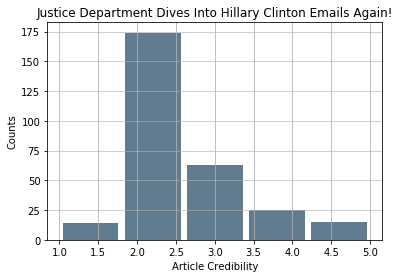

In [300]:
%matplotlib inline
#Histogram
ser = pd.Series(data.Art08)
ser.plot.hist(grid=True, bins=5, rwidth=0.9,
                   color='#607c8e')
plt.title('Justice Department Dives Into Hillary Clinton Emails Again!')
plt.xlabel('Article Credibility')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show